#### 数据预处理

In [1]:
import numpy as np
from os import listdir
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import time

In [2]:
def processing(filepath):
    timestamp = []
    KPI = []
    leafNum = []
    unemptyLeafNum = []
    FileList = listdir(filepath)
    m = len(FileList)
    # 从文件名中解析出训练集的类别
    for i in range(m):
        # 获取timestamp
        fileNameStr = FileList[i]
        classNumber = int(fileNameStr.split('.')[0])
        timestamp.append(classNumber)
        # 获取kpi的和
        data = pd.read_csv(filepath + "/" + fileNameStr, header=None, names=['i', 'e', 'c', 'p', 'l', 'KPI'])
        KPI.append(data['KPI'].sum())
        leafNum.append(len(data))
        unemptyLeafNum.append(len(data[data['KPI']!=0]))
    timestamp = np.array(timestamp)
    KPI = np.array(KPI)
    leafNum = np.array(leafNum)
    return KPI, timestamp, leafNum, unemptyLeafNum

def formatLabel(label):
    if np.isnan(label):
        return 0
    else:
        return label
    
def formatTimestamp2String(timestamp):
    return time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(timestamp/1000))

def formatString2Timestamp(string):
    return int(time.mktime(time.strptime(string, '%Y-%m-%d %H:%M:%S'))) * 1000

#### 第一阶段数据

In [3]:
KPI, timestamp, leafNum, unemptyLeafNum = processing("../2019AIOps_data")
KPISet = pd.DataFrame({"timestamp" : timestamp,"KPI": KPI, 'leafNum': leafNum, 'unemptyLeafNum': unemptyLeafNum})
KPISet = KPISet.sort_values(by='timestamp').reset_index(drop=True)
KPISet['timestamp_str'] = KPISet['timestamp'].apply(formatTimestamp2String)

header = ['timestamp', 'timestamp_str', 'KPI', 'leafNum', 'unemptyLeafNum']
KPISet = KPISet[header]

KPISet.to_csv('../result/KPI_with_date.csv', index=False, header=header)
KPISet['KPI'].to_csv('../result/KPI_without_date.csv', index=False, header=False)

print("时间范围", KPISet['timestamp_str'][0], KPISet['timestamp_str'][-1:])

时间范围 2018-09-01 00:00:00 4031    2018-09-14 23:55:00
Name: timestamp_str, dtype: object


In [4]:
KPISet.head()

,timestamp,timestamp_str,KPI,leafNum,unemptyLeafNum
0,1535731200000,2018-09-01 00:00:00,2163288,2359,2359
1,1535731500000,2018-09-01 00:05:00,1589309,2294,2294
2,1535731800000,2018-09-01 00:10:00,1354685,2198,2198
3,1535732100000,2018-09-01 00:15:00,1248242,2137,2137
4,1535732400000,2018-09-01 00:20:00,1132266,2079,2079


#### 第二阶段数据

In [5]:
KPI_test, timestamp_test, leafNum_test, unemptyLeafNum_test = processing("../2019AIOps_data_test1")
KPISet_test = pd.DataFrame({"timestamp" : timestamp_test,"KPI": KPI_test, 
                            'leafNum': leafNum_test, 'unemptyLeafNum': unemptyLeafNum_test})
KPISet_test = KPISet_test.sort_values(by='timestamp').reset_index(drop=True)
KPISet_test['timestamp_str'] = KPISet_test['timestamp'].apply(formatTimestamp2String)

header = ['timestamp', 'timestamp_str', 'KPI', 'leafNum', 'unemptyLeafNum']
KPISet_test = KPISet_test[header]

KPISet_test.to_csv('../result/KPI_test_with_date.csv', index=False, header=header)
KPISet_test['KPI'].to_csv('../result/KPI_test_without_date.csv', index=False, header=False)

print("时间范围", KPISet_test['timestamp_str'][0], KPISet_test['timestamp_str'][-1:])

时间范围 2018-09-15 00:00:00 4031    2018-09-28 23:55:00
Name: timestamp_str, dtype: object


In [6]:
KPISet_test = pd.read_csv("../result/KPI_test_with_date.csv")
outlier = pd.read_csv('../Anomalytime_data_test1.csv')
tmp = pd.DataFrame()
tmp['timestamp'] = outlier['timestamp']
tmp['label'] = [1 for i in range(len(tmp['timestamp']))]

KPISet_test = KPISet_test.merge(tmp, on='timestamp', how='left')
KPISet_test['label'] = KPISet_test['label'].apply(formatLabel)

header = ['timestamp', 'timestamp_str', 'KPI', 'leafNum', 'unemptyLeafNum', 'label']
KPISet_test = KPISet_test[header]

KPISet_test.to_csv('../result/KPI_test_with_label.csv', index=False,header=header)
KPISet_test.describe()

,timestamp,KPI,leafNum,unemptyLeafNum,label
count,4.032000e+03,4.032000e+03,4032.0,4032.000000,4032.000000
mean,1.537545e+12,1.482293e+06,30011.0,2722.741567,0.049603
std,3.492247e+08,7.865748e+05,0.0,731.151202,0.217151
min,1.536941e+12,1.412590e+05,30011.0,1132.000000,0.000000
25%,1.537243e+12,8.982652e+05,30011.0,2069.500000,0.000000
50%,1.537545e+12,1.651903e+06,30011.0,3085.000000,0.000000
75%,1.537848e+12,1.946062e+06,30011.0,3297.000000,0.000000
max,1.538150e+12,7.052967e+06,30011.0,5855.000000,1.000000


In [7]:
KPISet_test.head()

,timestamp,timestamp_str,KPI,leafNum,unemptyLeafNum,label
0,1536940800000,2018-09-15 00:00:00,1358012.0,30011,2449,0.0
1,1536941100000,2018-09-15 00:05:00,1284635.0,30011,2407,0.0
2,1536941400000,2018-09-15 00:10:00,1177365.0,30011,2369,0.0
3,1536941700000,2018-09-15 00:15:00,1080119.0,30011,2295,0.0
4,1536942000000,2018-09-15 00:20:00,1015664.0,30011,2230,0.0


#### 数据可视化

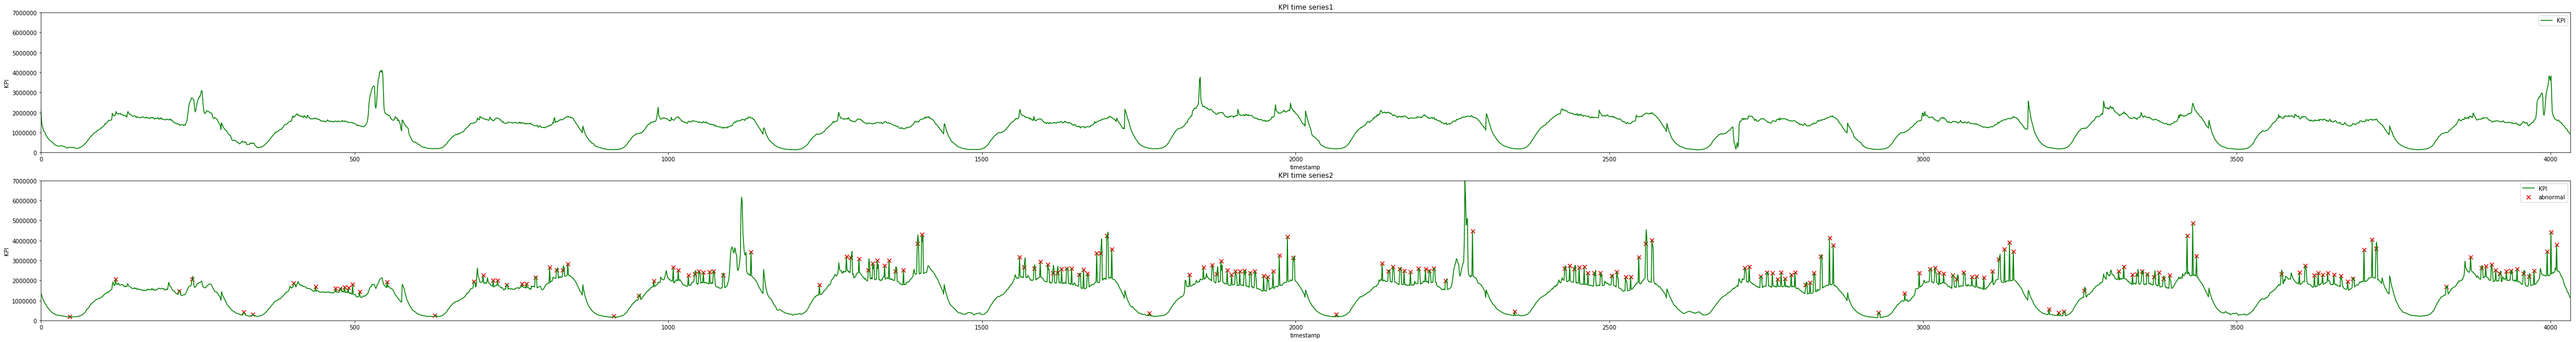

In [8]:
plt.figure(figsize=(80,10))
# 第一阶段总KPI
plt.subplot(211)
plt.xlabel('timestamp')
plt.ylabel('KPI')
plt.title('KPI time series1')
plt.plot(KPISet['KPI'], 'g', label='KPI')
plt.axis([0, 4032, 0, 7000000])
plt.legend(loc='best')
# 第二阶段总KPI
plt.subplot(212)
plt.xlabel('timestamp')
plt.ylabel('KPI')
plt.title('KPI time series2')
plt.plot(KPISet_test['KPI'], 'g', label='KPI')
plt.axis([0, 4032, 0, 7000000])
plt.scatter(KPISet_test[KPISet_test['label'] == 1].index,
            KPISet_test[KPISet_test['label'] == 1]['KPI'], 
            s=50, marker='x', color='red', label='abnormal')
plt.legend(loc='best')
plt.show()

#### 叶子节点数量分析

In [36]:
KPISet['unemptyLeafNum'].describe()

count    4032.000000
mean     2451.805060
std       662.008325
min      1086.000000
25%      1905.000000
50%      2788.000000
75%      2940.000000
max      3814.000000
Name: unemptyLeafNum, dtype: float64

In [37]:
KPISet_test['unemptyLeafNum'].describe()

count    4032.000000
mean     2722.741567
std       731.151202
min      1132.000000
25%      2069.500000
50%      3085.000000
75%      3297.000000
max      5855.000000
Name: unemptyLeafNum, dtype: float64

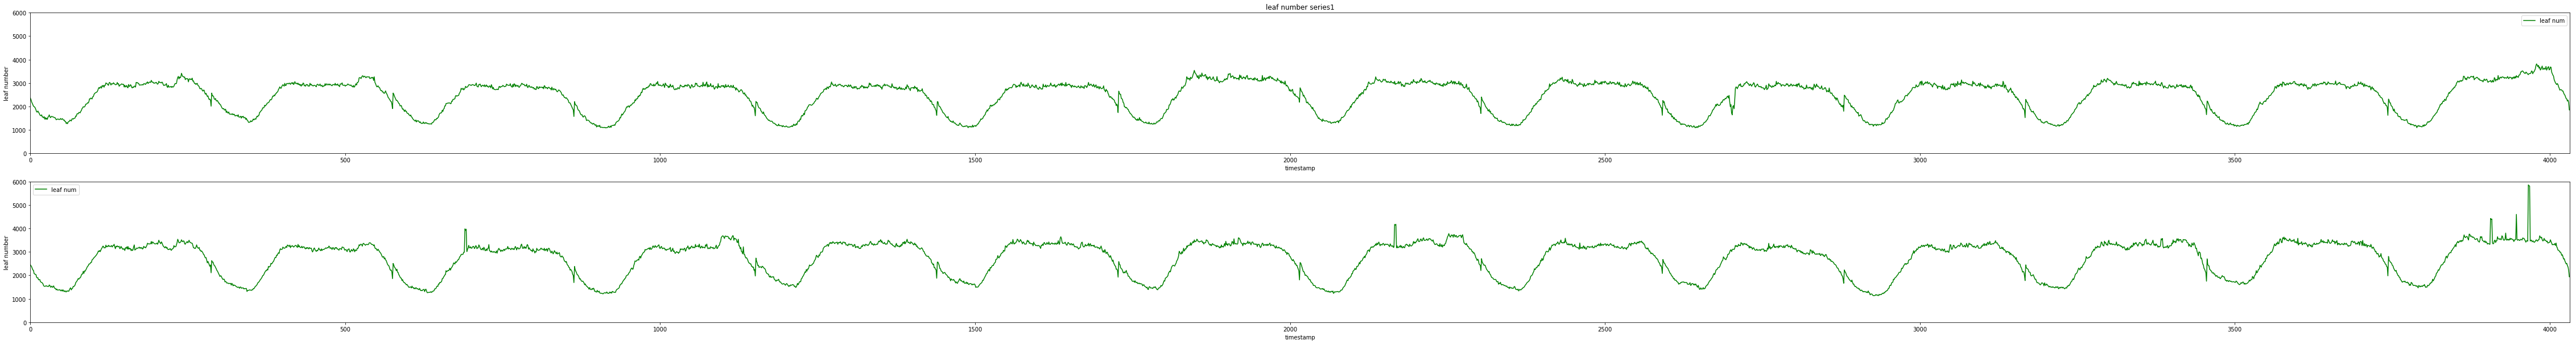

In [31]:
plt.figure(figsize=(80,10))
# 第一阶段总叶子节点数量
plt.subplot(211)
plt.xlabel('timestamp')
plt.ylabel('leaf number')
plt.title('leaf number series1')
plt.plot(KPISet['unemptyLeafNum'], 'g', label='leaf num')
plt.axis([0, 4032, 0, 6000])
plt.legend(loc='best')
# 第二阶段总叶子节点数量
plt.subplot(212)
plt.xlabel('timestamp')
plt.ylabel('leaf number')
plt.title('leaf number series2')
plt.plot(KPISet_test['unemptyLeafNum'], 'g', label='leaf num')
plt.axis([0, 4032, 0, 6000])
plt.legend(loc='best')
plt.show()

<Figure size 5760x720 with 0 Axes>

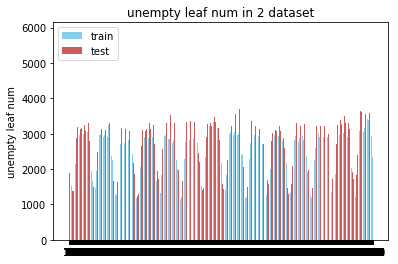

In [18]:
unemptyLeafNumList = KPISet['unemptyLeafNum'].tolist()
unemptyLeafNumTestList = KPISet_test['unemptyLeafNum'].tolist()

ind = np.arange(len(unemptyLeafNumList))  # the x locations for the groups
width = 0.35  # the width of the bars
plt.figure(figsize=(80,10))
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, unemptyLeafNumList, width,
                color='SkyBlue', label='train')
rects2 = ax.bar(ind + width/2, unemptyLeafNumTestList, width,
                color='IndianRed', label='test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('unempty leaf num')
ax.set_title('unempty leaf num in 2 dataset')
ax.set_xticks(ind)
ax.set_xticklabels([x for x in range(0, 4032)])
ax.legend()

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


# autolabel(rects1, "left")
# autolabel(rects2, "right")

plt.show()

In [30]:
rateAll = 0
for i in range(len(KPISet_test)):
    rateAll += KPISet_test.loc[i]['unemptyLeafNum'] / KPISet_test.loc[i]['leafNum']
print(rateAll/len(KPISet_test))

0.0907247864936


#### 保存叶子节点数量

In [35]:
KPISet['unemptyLeafNum'].to_csv('../result/KPISet_unemptyLeafNum.csv')
KPISet_test['unemptyLeafNum'].to_csv('../result/KPISetTest_unemptyLeafNum.csv')